In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from os import path
from os import listdir
from os.path import isfile, join

In [2]:
df_datos = pd.DataFrame()

carpeta = 'datos_pos'
onlyfiles = [f for f in listdir(carpeta) if isfile(join(carpeta, f)) if '.csv' in f]

In [3]:
onlyfiles

['derecha.csv', 'fueracama.csv', 'izquierda.csv', 'prono.csv', 'supino.csv']

In [4]:
for file_name in onlyfiles:
    df_temp = pd.read_csv(join(carpeta, file_name))
    if 'derecha' in file_name:
        etiqueta = 0
    elif 'izquierda' in file_name:
        etiqueta = 1
    elif 'supino' in file_name:
        etiqueta = 2
    elif 'prono' in file_name:
        etiqueta = 3
    elif 'fueracama' in file_name:
        etiqueta = 4
    df_temp['Etiqueta'] = etiqueta
    
    df_datos = pd.concat([df_datos,df_temp])

In [5]:
y = np.array(list(df_datos['Etiqueta']))
X = np.array(df_datos.iloc[:, 1:25])

In [6]:
clf = svm.SVC()
clf.fit(X,y)

SVC()

In [7]:
print(clf.predict([X[0]]))
arr_pred = X[0]
arr = clf.predict([X[0]])

[0]


C:\Users\jjaim\.conda\envs\mia_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


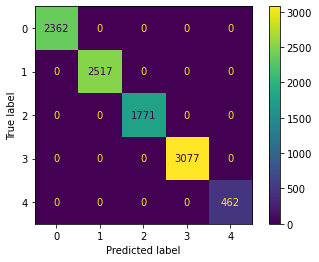

In [8]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


plot_confusion_matrix(clf, X, y)

plt.show()

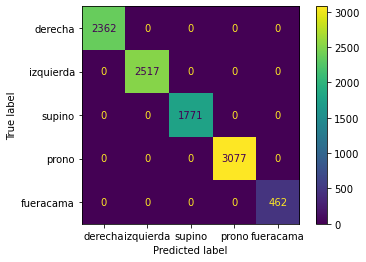

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_preds = clf.predict(X)
cm = confusion_matrix(y, y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['derecha','izquierda','supino','prono','fueracama'])
cmd.plot()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0,test_size=1./3)

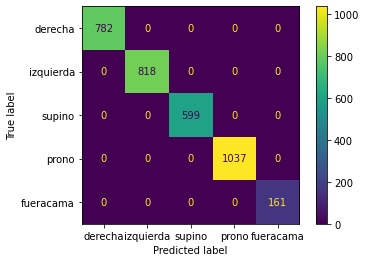

In [11]:
clf = svm.SVC()
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

cm = confusion_matrix(y_test, y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['derecha','izquierda','supino','prono','fueracama'])
cmd.plot()